In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [75]:
# Syntax to read csv file

data=pd.read_csv("Credit Card.csv")

In [76]:
# Syntax to make copy of Dataset

df=data.copy()

In [77]:
# Syntax to print 1st 5 rows of  Dataset

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [78]:
# Syntax to print Shape(Total no of rows & columns) of dataset

df.shape

(6362620, 11)

In [79]:
# Syntax to count number of values in particular column

df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [80]:
# Syntax to replace values with particular values in column

df.replace({'type':{'CASH_IN':0, 'CASH_OUT':1, 'PAYMENT':2, 'TRANSFER':3, 'DEBIT':4}}, inplace=True)

In [81]:
#Syntax to print information about the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 534.0+ MB


In [82]:
# Syntax to drop Column in Dataset

df=df.drop(["step", "isFlaggedFraud"], axis=1, inplace=True)

In [10]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,3,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [11]:
# Syntax to find duplicated values in dataset

df.duplicated().sum()

0

In [12]:
# Syntax to find null values in dataset

df.isna().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

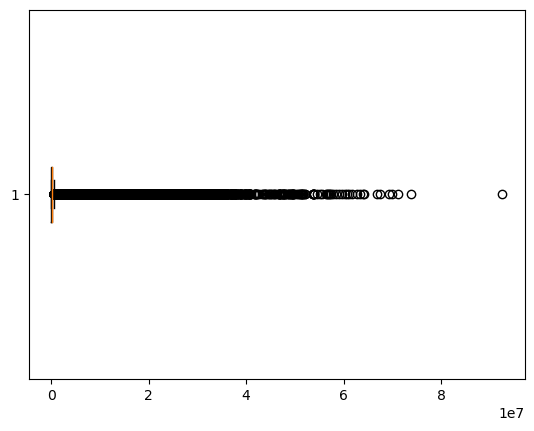

In [13]:
# Syntax to find total number of outliers in a Particular Column

plt.boxplot(df["amount"], vert=False)
plt.show()

In [14]:
# Syntax to find outlier using quantile range

out1=df["amount"][df["amount"]>df["amount"].quantile(0.85)]
out1

24          311685.89
84          379856.23
85         1505626.01
86          554026.99
88          761507.39
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: amount, Length: 954393, dtype: float64

In [15]:
# Syntax to replace outlier with mean value using np.where function

# numpy.where(condition, x, y)
# import numpy as np

#arr = np.array([1, 2, 3, 4, 5])
#condition = np.array([True, False, True, False, True])
#result = np.where(condition, arr, 0)
#print(result)

df["amount"]=np.where(df["amount"].isin(out1),df["amount"].mean(), df["amount"])

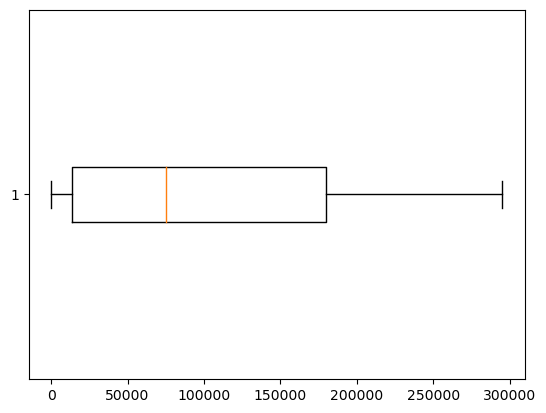

In [16]:
plt.boxplot(df["amount"], vert=False)
plt.show()

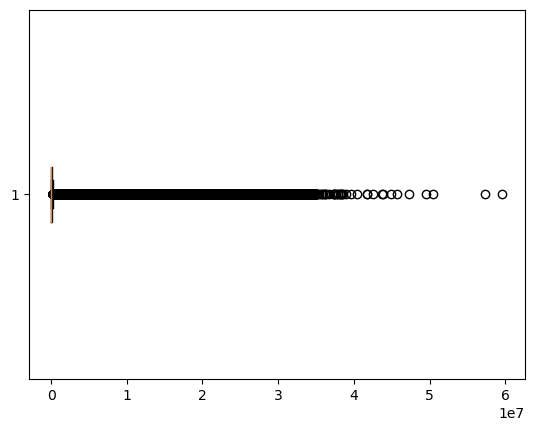

In [17]:
plt.boxplot(df["oldbalanceOrg"], vert=False)
plt.show()

In [18]:
out2=df["oldbalanceOrg"][df["oldbalanceOrg"]>df["oldbalanceOrg"].quantile(0.99)]

In [19]:
out2

19078      16083325.60
19079      16170014.49
19080      16504116.04
19081      16696318.32
19082      16830322.29
              ...     
6362460    17316255.05
6362462    17316255.05
6362576    45674547.89
6362578    35674547.89
6362580    25674547.89
Name: oldbalanceOrg, Length: 63627, dtype: float64

In [20]:
df["oldbalanceOrg"]=np.where(df["oldbalanceOrg"].isin(out2), df["oldbalanceOrg"].mean(),df["oldbalanceOrg"])

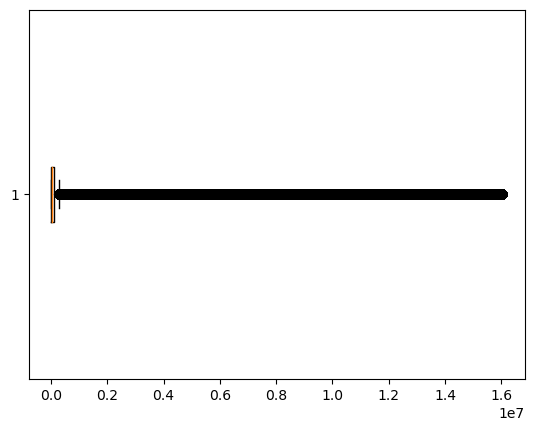

In [21]:
plt.boxplot(df["oldbalanceOrg"], vert=False)
plt.show()

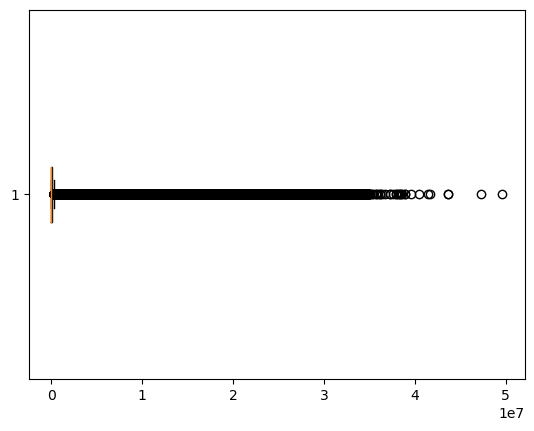

In [22]:
plt.boxplot(df["newbalanceOrig"], vert=False)
plt.show()

In [23]:
out3=df["newbalanceOrig"][df["newbalanceOrig"]>df["newbalanceOrig"].quantile(0.85)]

In [24]:
out3

14           499165.22
62           874042.26
63           871442.79
241         6309146.87
242         6307878.90
              ...     
6362576    35674547.89
6362578    25674547.89
6362580    15674547.89
6362582     5674547.89
6362584     5674547.89
Name: newbalanceOrig, Length: 954393, dtype: float64

In [25]:
df["newbalanceOrig"]=np.where(df["newbalanceOrig"].isin(out3), df["newbalanceOrig"].mean(), df["newbalanceOrig"])

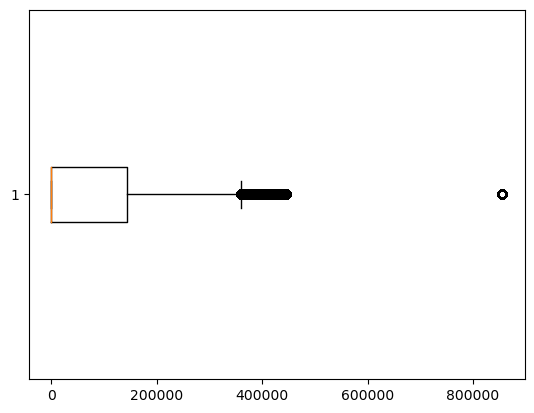

In [26]:
plt.boxplot(df["newbalanceOrig"], vert=False)
plt.show()

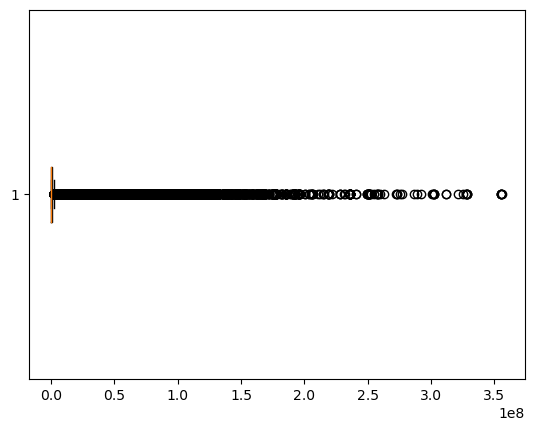

In [27]:
plt.boxplot(df["oldbalanceDest"], vert=False)
plt.show()

In [28]:
out4=df["oldbalanceDest"][df["oldbalanceDest"]>df["oldbalanceDest"].quantile(0.85)]
out4

89          2041543.62
94          3470595.10
96          5195482.15
113         5776776.41
156         5862200.03
              ...     
6362553    11436080.11
6362555     5524872.71
6362569     7203373.74
6362575     2930014.23
6362619     6510099.11
Name: oldbalanceDest, Length: 954393, dtype: float64

In [29]:
df["oldbalanceDest"]=np.where(df["oldbalanceDest"].isin(out4), df["oldbalanceDest"].mean(), df["oldbalanceDest"])

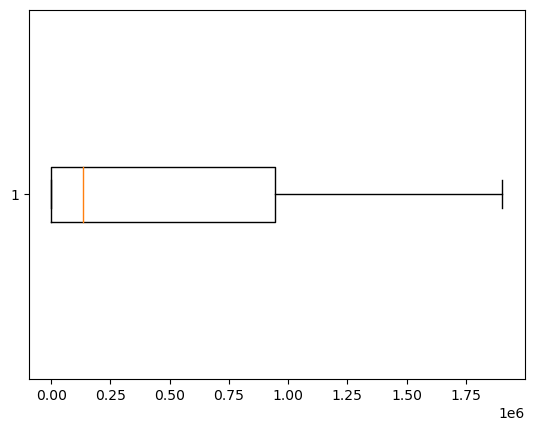

In [30]:
plt.boxplot(df["oldbalanceDest"], vert=False)
plt.show()

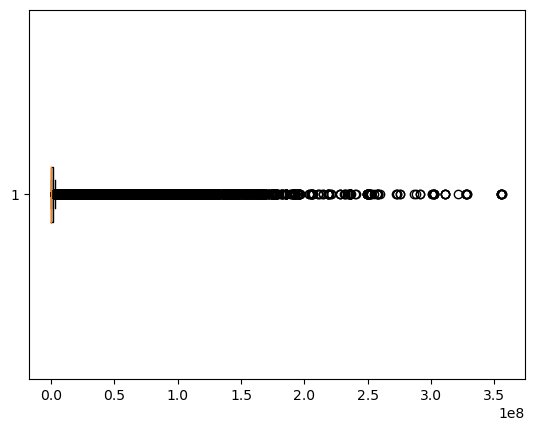

In [31]:
plt.boxplot(df["newbalanceDest"], vert=False)
plt.show()

In [32]:
out5=df["newbalanceDest"][df["newbalanceDest"]>df["newbalanceDest"].quantile(0.85)]
out5

24          2719172.89
48          6453430.91
83          3420103.09
84         19169204.93
85          5515763.34
              ...     
6362583    10192912.98
6362593     2171773.80
6362599     5238820.34
6362617     6379898.11
6362619     7360101.63
Name: newbalanceDest, Length: 954393, dtype: float64

In [33]:
df["newbalanceDest"]=np.where(df["newbalanceDest"].isin(out5), df["newbalanceDest"].mean(), df["newbalanceDest"])

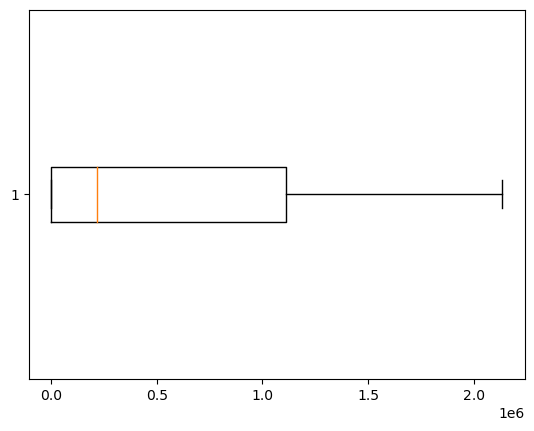

In [34]:
plt.boxplot(df["newbalanceDest"],vert=False)
plt.show()

In [35]:
# Syntax to convert Categorical column into dummies

df=pd.get_dummies(df, columns=["type"])

In [36]:
df.head()

,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_0,type_1,type_2,type_3,type_4
0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0,0
1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0,0
2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,1,0
3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0,0


In [37]:
df=df.drop(columns="nameDest", axis=1)


In [49]:
df=df.drop(columns="nameOrig", axis=1)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Splitting the data for training & testing

X=df.drop(columns=["isFraud"], axis=1)
y=df["isFraud"]

In [52]:
X.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_0,type_1,type_2,type_3,type_4
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0,0
2,181.00,181.0,0.00,0.0,0.0,0,0,0,1,0
3,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0,0


In [53]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [54]:
# Training & Testing the data by giving the train size 

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.75, random_state=23)

In [55]:
X_train.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_0,type_1,type_2,type_3,type_4
575698,6502.780000,39732.0,33229.220000,0.000000e+00,0.000000e+00,0,0,1,0,0
260323,8900.780000,17054.0,8153.220000,0.000000e+00,0.000000e+00,0,0,1,0,0
5809937,179861.903549,0.0,0.000000,1.100702e+06,1.224996e+06,0,0,0,1,0
4705099,179861.903549,902199.6,855113.668579,8.876791e+05,5.401250e+05,1,0,0,0,0
409266,77819.470000,0.0,0.000000,1.578796e+05,8.585881e+04,0,1,0,0,0


In [56]:
X_train.shape

(4771965, 10)

In [57]:
# Selecting appropriate model for our dataset

from sklearn.linear_model import LogisticRegression

In [58]:
model=LogisticRegression()

In [59]:
# Syntax to fit X,y values in appropriate model

model.fit(X,y)

LogisticRegression()

In [60]:
# Syntax to get a training score of appropriate model

model.score(X_train, y_train)

0.9990224152943284

In [61]:
# importing accuracy_score,confusion_matrix,classification_report from sklearn

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [62]:
# Predicting X_test values for testing

y_pred=model.predict(X_test)

In [63]:
# Syntax to print aacuracy score (testing score) of model

accuracy_score(y_test, y_pred)

0.9989727502192493

In [64]:
# Syntax to print confusion_matrix(where does our model actually gets confused)

confusion_matrix(y_test, y_pred)

array([[1588394,     180],
       [   1454,     627]], dtype=int64)

In [65]:
# Syntax to print classification report 

classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00   1588574\n           1       0.78      0.30      0.43      2081\n\n    accuracy                           1.00   1590655\n   macro avg       0.89      0.65      0.72   1590655\nweighted avg       1.00      1.00      1.00   1590655\n'

In [66]:
import seaborn as sns

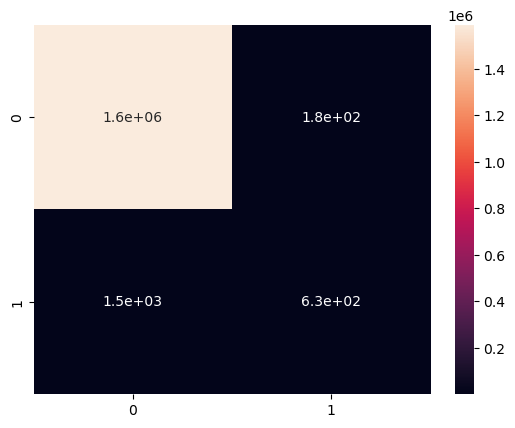

In [67]:
# Syntax to plot heatmap using seaborn

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [73]:
# Syntax to predict the output for input column

prediction = model.predict(X)
if prediction[[0]]==0:
    print("Prediction is Not Fraud")
else:
    print("Prediction is Fraud")

Prediction is Not Fraud
